In [1]:
%cd ../../../../

/home/users/dmoreno2016/ASTROMER/astromer_pe/astromer/presentation/experiments/astromer_1_pe


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import glob
import toml
import os

In [3]:
pretraining_path = 'results/pretraining/P02R01/macho_pe_nontrainable-2023-09-18_01-12-37'
finetuning_path = 'results/finetuning/P02R01/macho_pe_nontrainable'

datasets_names = ['alcock', 'atlas', 'ogle']
subsets = [500]
folds = [0, 1, 2]

In [4]:
#datasets_names = ['kepler', 'kepler_alcock_linear', 'kepler_atlas_linear', 'kepler_ogle_linear']
#subsets = ['all']

#datasets_names = ['alcock', 'atlas', 'ogle', 'kepler', 'kepler_alcock_linear', 'kepler_atlas_linear', 'kepler_ogle_linear']
#subsets = [50]

In [5]:
## Pretraining metrics
dict_logs_pretraining = dict()

for subset_name in subsets:
    if subset_name != 'all':
        path_metrics = os.path.join(pretraining_path, 'test_metrics_datasets_{}.toml'.format(subset_name))
    else:
        path_metrics = os.path.join(pretraining_path, 'test_metrics_datasets.toml')

    with open(path_metrics, 'r') as f:
        dict_logs_pretraining['{}'.format(subset_name)] = toml.load(f)

In [6]:
dict_logs_pretraining

{'500': {'alcock': {'fold_0': {'loss': 0.012226778082549572,
    'r_square': 0.808908224105835,
    'rmse': 0.012226778082549572},
   'fold_1': {'loss': 0.009291102178394794,
    'r_square': 0.811577320098877,
    'rmse': 0.009291102178394794},
   'fold_2': {'loss': 0.011687163263559341,
    'r_square': 0.8036507964134216,
    'rmse': 0.011687163263559341}},
  'atlas': {'fold_0': {'loss': 13.850532531738281,
    'r_square': -197.44361877441406,
    'rmse': 13.850532531738281},
   'fold_1': {'loss': 13.593445777893066,
    'r_square': -204.028564453125,
    'rmse': 13.593445777893066},
   'fold_2': {'loss': 11.943086624145508,
    'r_square': -160.1011962890625,
    'rmse': 11.943086624145508}},
  'ogle': {'fold_0': {'loss': 0.01535352598875761,
    'r_square': 0.6782771944999695,
    'rmse': 0.01535352598875761},
   'fold_1': {'loss': 0.011911943554878235,
    'r_square': 0.7520268559455872,
    'rmse': 0.011911943554878235},
   'fold_2': {'loss': 0.016122855246067047,
    'r_square': 

In [7]:
dict_pt_metrics = {
    'mean': {
        'r2': {k: [] for k in datasets_names},
        'rmse': {k: [] for k in datasets_names},
        'time_epoch': {k: 0 for k in datasets_names},
        'time_batch': {k: 0 for k in datasets_names},
    },

    'std': {
        'r2': {k: [] for k in datasets_names},
        'rmse': {k: [] for k in datasets_names},
        'time_epoch': {k: 0 for k in datasets_names},
        'time_batch': {k: 0 for k in datasets_names},
    },
}

In [8]:
for subset in subsets:
    for ds_name in datasets_names:            
        list_r2, list_rmse, list_time_epoch, list_time_batch = [], [], [], []
        for fold in folds:
            list_r2.append(dict_logs_pretraining['{}'.format(subset)][ds_name]['fold_{}'.format(fold)]['r_square'])
            list_rmse.append(dict_logs_pretraining['{}'.format(subset)][ds_name]['fold_{}'.format(fold)]['rmse'])
            
        dict_pt_metrics['mean']['r2'][ds_name].append(np.mean(list_r2))
        dict_pt_metrics['mean']['rmse'][ds_name].append(np.mean(list_rmse))

        dict_pt_metrics['std']['r2'][ds_name].append(np.std(list_r2))
        dict_pt_metrics['std']['rmse'][ds_name].append(np.std(list_rmse))

    for stat_name, dict_metric in dict_pt_metrics.items():

        for metric_name, dict_results in dict_metric.items():
            dict_pt_metrics['{}'.format(stat_name)]['{}'.format(metric_name)] = pd.DataFrame(dict_results, 
                                                                                             index=['Without FT'])

In [10]:
dict_pt_metrics

{'mean': {'r2':               alcock       atlas      ogle
  Without FT  0.808045 -187.191127  0.705856,
  'rmse':               alcock      atlas      ogle
  Without FT  0.011068  13.129022  0.014463,
  'time_epoch':             alcock  atlas  ogle
  Without FT       0      0     0,
  'time_batch':             alcock  atlas  ogle
  Without FT       0      0     0},
 'std': {'r2':               alcock      atlas      ogle
  Without FT  0.003293  19.343192  0.032853,
  'rmse':               alcock     atlas      ogle
  Without FT  0.001276  0.845125  0.001831,
  'time_epoch':             alcock  atlas  ogle
  Without FT       0      0     0,
  'time_batch':             alcock  atlas  ogle
  Without FT       0      0     0}}

In [12]:
dict_pt_metrics['mean']['r2'][ds_name]

Without FT    0.705856
Name: ogle, dtype: float64

In [11]:
dict_logs_pretraining['{}'.format(subset)][ds_name]['fold_{}'.format(fold)]['r_square']

0.6872642636299133

In [9]:
list_r2

[0.6782771944999695, 0.7520268559455872, 0.6872642636299133]

In [42]:
dict_pt_metrics

{'mean': {'r2':               alcock       atlas      ogle
  Without FT  0.808045 -187.191127  0.705856,
  'rmse':               alcock      atlas      ogle
  Without FT  0.011068  13.129022  0.014463,
  'time_epoch':             alcock  atlas  ogle
  Without FT       0      0     0,
  'time_batch':             alcock  atlas  ogle
  Without FT       0      0     0},
 'std': {'r2':               alcock      atlas      ogle
  Without FT  0.003293  19.343192  0.032853,
  'rmse':               alcock     atlas      ogle
  Without FT  0.001276  0.845125  0.001831,
  'time_epoch':             alcock  atlas  ogle
  Without FT       0      0     0,
  'time_batch':             alcock  atlas  ogle
  Without FT       0      0     0}}

## Extract finetuning metrics

In [43]:
## Finetuning metrics

dict_logs_finetuning = dict()
for path_lr_files in glob.glob('{}/*'.format(finetuning_path)):
    lr = path_lr_files.split('/')[-1]

    dict_logs_finetuning[lr] = dict()
    for path_science_cases in glob.glob('{}/*'.format(path_lr_files)):
        spc = path_science_cases.split('/')[-1]

        dict_logs_finetuning[lr][spc] = dict()
        for path_ds_name in glob.glob('{}/*'.format(path_science_cases)):
            ds_name = path_ds_name.split('/')[-1]

            #if ds_name in ds_names:

            dict_logs_finetuning[lr][spc][ds_name] = dict()
            for path_fold in glob.glob('{}/*'.format(path_ds_name)):
                fold_name = path_fold.split('/')[-1]

                dict_logs_finetuning[lr][spc][ds_name][fold_name] = dict()
                for path_subsets in glob.glob('{}/*'.format(path_fold)):
                    #print(path_subsets)
                    subset_name = path_subsets.split('/')[-1]

                    #if subset_name.split('_')[-1] in subsets:
                    
                    with open(os.path.join(path_subsets, 'metrics.toml'), 'r') as f:
                        metrics = toml.load(f)

                    dict_logs_finetuning[lr][spc][ds_name][fold_name][subset_name] = dict()
                    #for files in ['metrics', 'time_epoch', 'time_batch']:
                    dict_logs_finetuning[lr][spc][ds_name][fold_name][subset_name]['metrics'] = metrics
                    dict_logs_finetuning[lr][spc][ds_name][fold_name][subset_name]['time_batch'] = pd.read_csv(os.path.join(path_subsets, 'time_batch.csv'))
                    dict_logs_finetuning[lr][spc][ds_name][fold_name][subset_name]['time_epoch'] = pd.read_csv(os.path.join(path_subsets, 'time_epoch.csv'))


In [44]:
lr = 'lr_1e-05'

In [45]:
dict_ft_metrics = {
    'mean': {
        'r2': {k: [] for k in datasets_names},
        'rmse': {k: [] for k in datasets_names},
        'time_epoch': {k: [] for k in datasets_names},
        'time_batch': {k: [] for k in datasets_names},
    },

    'std': {
        'r2': {k: [] for k in datasets_names},
        'rmse': {k: [] for k in datasets_names},
        'time_epoch': {k: [] for k in datasets_names},
        'time_batch': {k: [] for k in datasets_names},
    },
}

for subset in subsets:

    list_idx = []
    for idx_name in list(dict_logs_finetuning['lr_1e-05'].keys()):

        for ds_name in datasets_names:            

            list_r2, list_rmse, list_time_epoch, list_time_batch = [], [], [], []
            for fold in folds:
                if subset != 'all':
                    list_r2.append(dict_logs_finetuning[lr][idx_name][ds_name]['fold_{}'.format(fold)]['{}_{}'.format(ds_name, subset)]['metrics']['test_r_square'])
                    list_rmse.append(dict_logs_finetuning[lr][idx_name][ds_name]['fold_{}'.format(fold)]['{}_{}'.format(ds_name, subset)]['metrics']['test_rmse'])
                    list_time_epoch.append(dict_logs_finetuning[lr][idx_name][ds_name]['fold_{}'.format(fold)]['{}_{}'.format(ds_name, subset)]['time_epoch'].time_epoch.values.sum())
                    list_time_batch.append(dict_logs_finetuning[lr][idx_name][ds_name]['fold_{}'.format(fold)]['{}_{}'.format(ds_name, subset)]['time_batch'].time_batch.values.sum())

                else:
                    list_r2.append(dict_logs_finetuning[lr][idx_name][ds_name]['fold_{}'.format(fold)]['{}'.format(ds_name)]['metrics']['test_r_square'])
                    list_rmse.append(dict_logs_finetuning[lr][idx_name][ds_name]['fold_{}'.format(fold)]['{}'.format(ds_name)]['metrics']['test_rmse'])
                    list_time_epoch.append(dict_logs_finetuning[lr][idx_name][ds_name]['fold_{}'.format(fold)]['{}'.format(ds_name)]['time_epoch'].time_epoch.values.sum())
                    list_time_batch.append(dict_logs_finetuning[lr][idx_name][ds_name]['fold_{}'.format(fold)]['{}'.format(ds_name)]['time_batch'].time_batch.values.sum())

            dict_ft_metrics['mean']['r2'][ds_name].append(np.mean(list_r2))
            dict_ft_metrics['mean']['rmse'][ds_name].append(np.mean(list_rmse))
            dict_ft_metrics['mean']['time_epoch'][ds_name].append(np.mean(list_time_epoch))
            dict_ft_metrics['mean']['time_batch'][ds_name].append(np.mean(list_time_batch))

            dict_ft_metrics['std']['r2'][ds_name].append(np.std(list_r2))
            dict_ft_metrics['std']['rmse'][ds_name].append(np.std(list_rmse))
            dict_ft_metrics['std']['time_epoch'][ds_name].append(np.std(list_time_epoch))
            dict_ft_metrics['std']['time_batch'][ds_name].append(np.std(list_time_batch))

        list_idx.append(idx_name)
        
    for stat_name, dict_metric in dict_ft_metrics.items():

        for metric_name, dict_results in dict_metric.items():
            dict_ft_metrics['{}'.format(stat_name)]['{}'.format(metric_name)] = pd.DataFrame(dict_results, 
                                                                                          index=list_idx)
            

In [46]:
dict_ft_metrics

{'mean': {'r2':                   alcock      atlas      ogle
  PE              0.806140 -15.728004  0.702941
  FF1_PE_ATT_FF2  0.809169   0.431242  0.836485
  FF1_ATT_FF2     0.814177   0.318223  0.832972
  FF1_PE          0.806660 -15.082945  0.748814,
  'rmse':                   alcock     atlas      ogle
  PE              0.011641  2.173689  0.013484
  FF1_PE_ATT_FF2  0.010793  0.077756  0.006231
  FF1_ATT_FF2     0.010369  0.091044  0.006673
  FF1_PE          0.011040  2.021411  0.011822,
  'time_epoch':                     alcock       atlas         ogle
  PE               91.066089   92.881064   349.037878
  FF1_PE_ATT_FF2  256.629807  252.167423  1092.578019
  FF1_ATT_FF2     174.979159  456.048152   981.372653
  FF1_PE           81.779074   87.371504   432.006693,
  'time_batch':                    alcock       atlas        ogle
  PE              49.379762   22.535924  222.302506
  FF1_PE_ATT_FF2  75.561855   59.954624  654.933013
  FF1_ATT_FF2     98.264741  111.332434  370.1

## RMSE v/s Finetuning time

In [47]:
import seaborn as sns

In [48]:
dict_ft_metrics['mean']['r2'].index

Index(['PE', 'FF1_PE_ATT_FF2', 'FF1_ATT_FF2', 'FF1_PE'], dtype='object')

In [49]:
set_layers_trainable = dict_ft_metrics['mean']['r2'].index
set_layers_trainable

Index(['PE', 'FF1_PE_ATT_FF2', 'FF1_ATT_FF2', 'FF1_PE'], dtype='object')

In [50]:
dict_results = {
    'Time Mean': [],
    'R^2 PT Mean': [],
    'R^2 FT Mean': [],
    u'Δ R^2 Mean': [],
    'RMSE PT Mean': [],
    'RMSE FT Mean': [],
    u'Δ RMSE Mean': [],
    'Time Std': [],
    'R^2 PT Std': [],
    'R^2 FT Std': [],
    u'Δ R^2 Std': [],
    'RMSE PT Std': [],
    'RMSE FT Std': [],
    u'Δ RMSE Std': [],
    'Dataset name': [],
    'Trainable layers': [],
}

for dataset_name in datasets_names:

    for layers_trainable in set_layers_trainable:        

        dict_results['Time Mean'].append(dict_ft_metrics['mean']['time_epoch'][dataset_name].filter(items=[layers_trainable], axis=0).iloc[0])
        dict_results['R^2 PT Mean'].append(dict_pt_metrics['mean']['r2'][dataset_name].filter(items=['Without FT'], axis=0).iloc[0])
        dict_results['R^2 FT Mean'].append(dict_ft_metrics['mean']['r2'][dataset_name].filter(items=[layers_trainable], axis=0).iloc[0])
        dict_results[u'Δ R^2 Mean'].append(dict_ft_metrics['mean']['r2'][dataset_name].filter(items=[layers_trainable], axis=0).iloc[0] \
                                            - dict_pt_metrics['mean']['r2'][dataset_name].filter(items=['Without FT'], axis=0).iloc[0])
        dict_results['RMSE PT Mean'].append(dict_pt_metrics['mean']['rmse'][dataset_name].filter(items=['Without FT'], axis=0).iloc[0])
        dict_results['RMSE FT Mean'].append(dict_ft_metrics['mean']['rmse'][dataset_name].filter(items=[layers_trainable], axis=0).iloc[0])
        dict_results[u'Δ RMSE Mean'].append(dict_pt_metrics['mean']['rmse'][dataset_name].filter(items=['Without FT'], axis=0).iloc[0] \
                                            - dict_ft_metrics['mean']['rmse'][dataset_name].filter(items=[layers_trainable], axis=0).iloc[0])

        dict_results['Time Std'].append(dict_ft_metrics['std']['time_epoch'][dataset_name].filter(items=[layers_trainable], axis=0).iloc[0])
        dict_results['R^2 PT Std'].append(dict_pt_metrics['std']['r2'][dataset_name].filter(items=['Without FT'], axis=0).iloc[0])
        dict_results['R^2 FT Std'].append(dict_ft_metrics['std']['r2'][dataset_name].filter(items=[layers_trainable], axis=0).iloc[0])
        dict_results[u'Δ R^2 Std'].append(dict_ft_metrics['std']['r2'][dataset_name].filter(items=[layers_trainable], axis=0).iloc[0])
        dict_results['RMSE PT Std'].append(dict_pt_metrics['std']['rmse'][dataset_name].filter(items=['Without FT'], axis=0).iloc[0])
        dict_results['RMSE FT Std'].append(dict_ft_metrics['std']['rmse'][dataset_name].filter(items=[layers_trainable], axis=0).iloc[0])
        dict_results[u'Δ RMSE Std'].append(dict_ft_metrics['std']['rmse'][dataset_name].filter(items=[layers_trainable], axis=0).iloc[0])

        dict_results['Dataset name'].append(dataset_name.upper())
        dict_results['Trainable layers'].append(layers_trainable)

df_results = pd.DataFrame(dict_results)
df_results

,Time Mean,R^2 PT Mean,R^2 FT Mean,Δ R^2 Mean,RMSE PT Mean,RMSE FT Mean,Δ RMSE Mean,Time Std,R^2 PT Std,R^2 FT Std,Δ R^2 Std,RMSE PT Std,RMSE FT Std,Δ RMSE Std,Dataset name,Trainable layers
0,91.066089,0.808045,0.806140,-0.001906,0.011068,0.011641,-0.000573,15.077792,0.003293,0.004831,0.004831,0.001276,0.001698,0.001698,ALCOCK,PE
1,256.629807,0.808045,0.809169,0.001123,0.011068,0.010793,0.000276,50.374743,0.003293,0.003685,0.003685,0.001276,0.000873,0.000873,ALCOCK,FF1_PE_ATT_FF2
2,174.979159,0.808045,0.814177,0.006132,0.011068,0.010369,0.000700,68.466115,0.003293,0.000856,0.000856,0.001276,0.000906,0.000906,ALCOCK,FF1_ATT_FF2
3,81.779074,0.808045,0.806660,-0.001386,0.011068,0.011040,0.000028,13.378001,0.003293,0.001935,0.001935,0.001276,0.000783,0.000783,ALCOCK,FF1_PE
4,92.881064,-187.191127,-15.728004,171.463123,13.129022,2.173689,10.955333,15.348460,19.343192,0.545137,0.545137,0.845125,0.053865,0.053865,ATLAS,PE
5,252.167423,-187.191127,0.431242,187.622368,13.129022,0.077756,13.051266,92.743748,19.343192,0.173372,0.173372,0.845125,0.024117,0.024117,ATLAS,FF1_PE_ATT_FF2
6,456.048152,-187.191127,0.318223,187.509350,13.129022,0.091044,13.037978,209.851745,19.343192,0.436456,0.436456,0.845125,0.049796,0.049796,ATLAS,FF1_ATT_FF2
7,87.371504,-187.191127,-15.082945,172.108181,13.129022,2.021411,11.107611,16.064611,19.343192,0.878112,0.878112,0.845125,0.106665,0.106665,ATLAS,FF1_PE
8,349.037878,0.705856,0.702941,-0.002915,0.014463,0.013484,0.000979,43.793981,0.032853,0.049844,0.049844,0.001831,0.001599,0.001599,OGLE,PE
9,1092.578019,0.705856,0.836485,0.130629,0.014463,0.006231,0.008232,366.608726,0.032853,0.004473,0.004473,0.001831,0.000225,0.000225,OGLE,FF1_PE_ATT_FF2


In [35]:
df_results.to_pickle('datasets_al_at_og_500.pkl')

## Pretraining evaluated directly in the datasets

In [75]:
df_results_filtered = df_results[df_results['Dataset name'] != 'ATLAS']
df_results_filtered

,Time Mean,Δ R^2 Mean,Δ RMSE Mean,Time Std,Δ R^2 Std,Δ RMSE Std,Dataset name,Trainable layers
0,91.066089,-0.001906,-0.000573,15.077792,0.004831,0.001698,ALCOCK,PE
1,256.629807,0.001123,0.000276,50.374743,0.003685,0.000873,ALCOCK,FF1_PE_ATT_FF2
2,174.979159,0.006132,0.000700,68.466115,0.000856,0.000906,ALCOCK,FF1_ATT_FF2
3,81.779074,-0.001386,0.000028,13.378001,0.001935,0.000783,ALCOCK,FF1_PE
8,349.037878,-0.002915,0.000979,43.793981,0.049844,0.001599,OGLE,PE
9,1092.578019,0.130629,0.008232,366.608726,0.004473,0.000225,OGLE,FF1_PE_ATT_FF2
10,981.372653,0.127116,0.007790,112.541414,0.005090,0.000266,OGLE,FF1_ATT_FF2
11,432.006693,0.042958,0.002641,121.378258,0.047326,0.001348,OGLE,FF1_PE


In [18]:
df_results_filtered = df_results.copy()

/home/users/dmoreno2016/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/users/dmoreno2016/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/users/dmoreno2016/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/users/dmoreno2016/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

Text(0.5, 29.000000000000014, 'Training time')

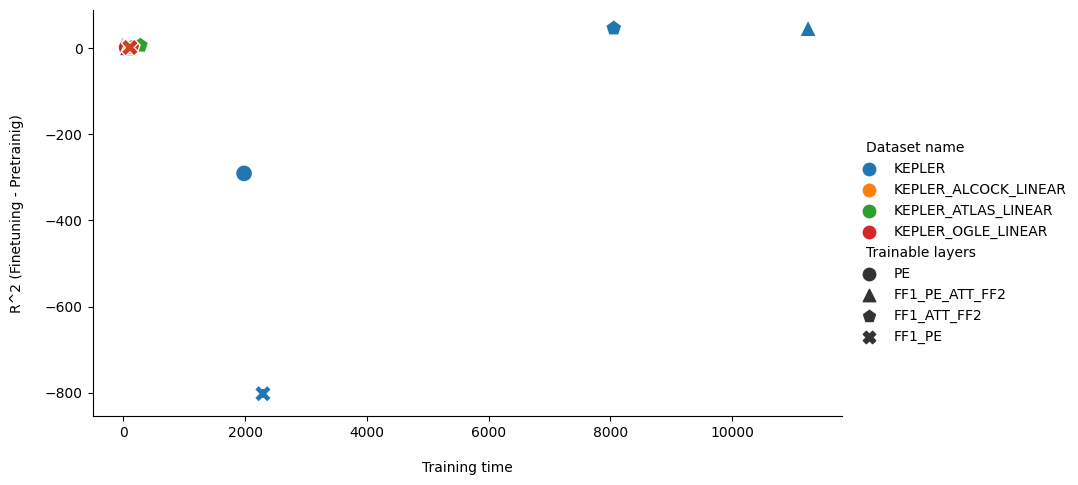

In [19]:
markers_set=['o', '^', 'p', 'X']


ax = sns.relplot(data=df_results_filtered, x='Time Mean', y=u'Δ R^2 Mean', hue='Dataset name', style='Trainable layers', s=150, height=4.8, aspect=1.8,
                 markers=markers_set)

markers, caps, bars = ax.ax.errorbar(df_results_filtered['Time Mean'], df_results_filtered[u'Δ R^2 Mean'],
                                     yerr=df_results_filtered[u'Δ R^2 Std'],
                                     #xerr=df_results['Time Std'],
                                     fmt='o',
                                     markersize=10,
                                     zorder=1, )

markers.set_markerfacecolor((1, 1, 0, 0.01))

for lh in ax._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [80] 

plt.ylabel('R^2 (Finetuning - Pretrainig)', labelpad=15)
plt.xlabel('Training time', labelpad=15)